In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
from scipy import stats
from random import random

In [2]:
# Read the files and import all rows.
df = pd.read_csv('flight_delays_2011_2021.csv')
##
cols=["year"," month"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

# Identify the airports in the state of Connecticut.
df['CT'] = df['airport_name'].apply(lambda x: x.find('CT'))
# Create a set of airport names (to eliminate the duplicates).
airports = set(df[df['CT'] != -1]['airport_name'])
# Display the list of airports.
print('CT Airports:', airports)

CT Airports: {'Hartford, CT: Bradley International', 'New Haven, CT: Tweed New Haven'}


In [25]:
selected_airport_data.mean()

year                   2016.450326
 month                    6.481270
arr_flights             181.836052
arr_del15                34.887255
carrier_ct               13.381264
 weather_ct               1.324543
nas_ct                    7.293442
security_ct               0.094021
late_aircraft_ct         12.737365
arr_cancelled             3.642741
arr_diverted              0.248777
 arr_delay             2049.613377
 carrier_delay          771.206362
weather_delay           115.296085
nas_delay               312.999184
security_delay            3.982055
late_aircraft_delay     846.129690
CT                       10.000000
dtype: float64

Text(0.5, 1.0, 'Arrival Distribution (KBDL)')

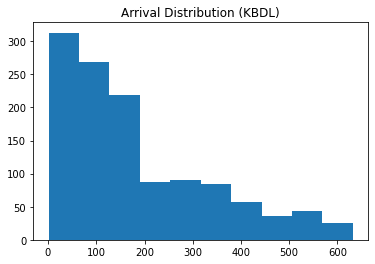

In [34]:
selected_airport_data = df[df["airport_name"] == "Hartford, CT: Bradley International"]
southwest_data_BDL = selected_airport_data[selected_airport_data["carrier"] == "WN"]
delta_data_BDL = selected_airport_data[selected_airport_data["carrier"] == "DL"]  
american_data_BDL = selected_airport_data[selected_airport_data["carrier"] == "AA"]
blue_data_BDL = selected_airport_data[selected_airport_data["carrier"] == "B6"]


plt.hist(selected_airport_data['arr_flights'].dropna())
plt.title('Arrival Distribution (KBDL)')

    **Air Carrier**: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
    **Extreme Weather**: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
    **National Aviation System (NAS)**: Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
    **Late-arriving aircraft**: A previous flight with same aircraft arrived late, causing the present flight to depart late.
    **Security**: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.


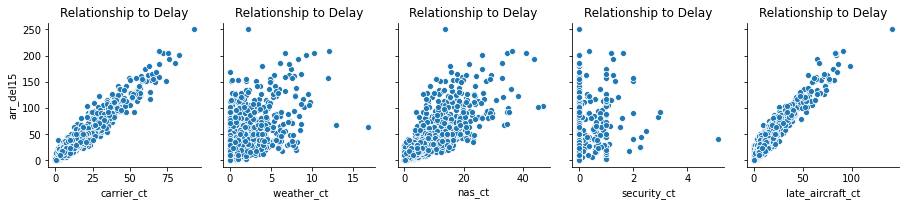

In [5]:
q= sns.pairplot(selected_airport_data,
    x_vars=["carrier_ct", " weather_ct", "nas_ct",'security_ct','late_aircraft_ct' ],
    y_vars=["arr_del15"],)
q.set(title = 'Relationship to Delay')

[Text(0.5, 1.0, 'Scheduled flights into KBDL (Per Month)')]

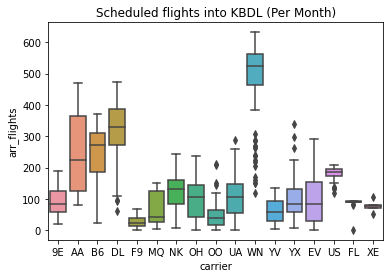

In [6]:
#number of flight into KBDL in a 10 year period  
#we see that WN has the highest number of flights into BDL than 
p1 = sns.boxplot(selected_airport_data['carrier'], selected_airport_data['arr_flights'])
p1.set(title = "Scheduled flights into KBDL (Per Month)")

[Text(0.5, 1.0, 'Delayed flights into KBDL')]

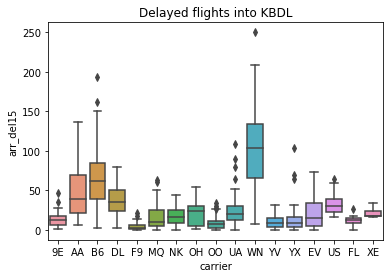

In [7]:
#number of delayed flights into KBDL in a 10 year period
p = sns.boxplot(selected_airport_data['carrier'], selected_airport_data['arr_del15'])
p.set(title = "Delayed flights into KBDL")

[Text(0.5, 1.0, 'Delayed Flights by Carrier')]

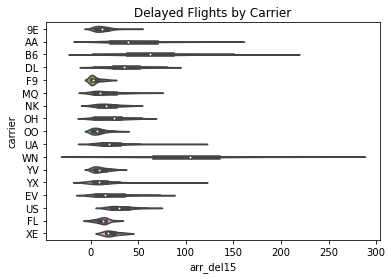

In [24]:
n = sns.violinplot(selected_airport_data["arr_del15"], selected_airport_data["carrier"])
n.set(title = 'Delayed Flights by Carrier')

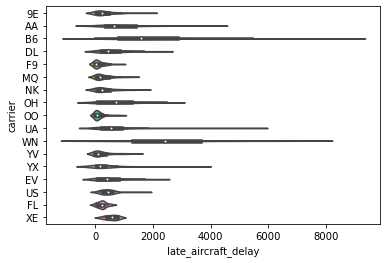

In [9]:
sns.violinplot(selected_airport_data["late_aircraft_delay"], selected_airport_data["carrier"])

In [ ]:
x = southwest_data_BDL[[ 'arr_del15', 'carrier_ct',
                   'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 
                   'arr_diverted', ' carrier_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]

y = southwest_data_BDL['arr_flights']



[Text(0.5, 1.0, 'Southwest Delays')]

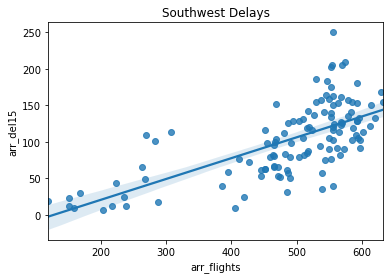

In [41]:
west= sns.regplot(x ='arr_flights' , y ='arr_del15' , data=southwest_data_BDL, )
west.set(title = 'Southwest Delays')

In [ ]:
# Subset DataFrame for planes arriving with values in both the carrier_ct and weather_ct columns.
df_f = df[(df['date'] >= '2010-01') & (df['date'] <= '2020-12') & (df['airport'] == 'BDL') 
          & (df['carrier_ct'] > 0) & (df[' weather_ct'] > 0)]

diverted_count = str(df_f['carrier_ct'].sum()  + df_f[' weather_ct'].sum())

##Perhaps do this twice so that we can see BDL and Tweed?
##Surface summary regarding the two airports that the user requests. 
##
# Add together the sums of the two columns to obtain the total number of delays.

print("Number of Delays at KBDL:" + diverted_count)

In [75]:
# Create a DataFrame containing airline names, total arriving flights and number of cancelled flights.
df_flights = selected_airport_data.groupby('carrier_name')['arr_flights'].sum().reset_index(name='Flights Arrived')
df_cancelled = selected_airport_data.groupby('carrier_name')['arr_del15'].sum().reset_index(name='Flights Delayed')
df_cancelled = pd.merge(df_cancelled, df_flights, on='carrier_name')

# Calculate the percentage of flights cancelled.
df_cancelled['Proportion'] = df_cancelled['Flights Delayed'] / df_cancelled['Flights Arrived'] * 100

# Display the airline with the most cancellations as a percentage of total arriving flights.
df_cancelled.sort_values(by=['Proportion'], ascending=True).head(30)

,carrier_name,Flights Delayed,Flights Arrived,Proportion
5,Endeavor Air Inc.,508.0,4255.0,11.938895
4,Delta Air Lines Inc.,4490.0,37596.0,11.942760
14,Republic Airline,629.0,4534.0,13.872960
17,Spirit Air Lines,907.0,6492.0,13.971041
3,Atlantic Southeast Airlines,69.0,476.0,14.495798
0,AirTran Airways Corporation,160.0,1085.0,14.746544
8,ExpressJet Airlines LLC,9.0,57.0,15.789474
11,Mesa Airlines Inc.,731.0,4599.0,15.894760
9,Frontier Airlines Inc.,139.0,820.0,16.951220
15,SkyWest Airlines Inc.,784.0,4492.0,17.453250


In [28]:
# Calculate the average number of delays per airport.
avg_delays = selected_airport_data.groupby('airport')['arr_del15'].sum().mean()

# Display average number of delays per airport.
print('Average Number of Delays per Airport: ' + str(avg_delays))

Average Number of Delays per Airport: 42702.0


In [30]:
#show the top X airlines that have the least amount of delays
selected_airport_data.groupby('carrier')['arr_del15'].mean().nlargest(10).reset_index(name='Monthly Av.')

,carrier,Monthly Av.
0,WN,102.619835
1,B6,63.644628
2,AA,47.363636
3,DL,37.107438
4,US,32.297872
5,UA,22.675000
6,OH,21.930233
7,XE,21.800000
8,EV,20.604651
9,NK,17.442308


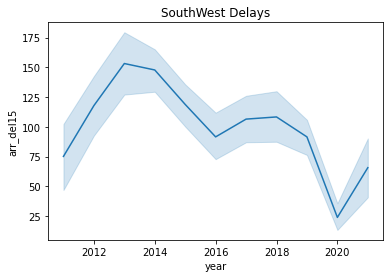

In [78]:
ll = sns.lineplot(x = "year", y = "arr_del15", data = southwest_data_BDL)
ll.set(title = 'SouthWest Delays')

delta_data_BDL = selected_airport_data[selected_airport_data["carrier"] == "DL"]  
american_data_BDL = selected_airport_data[selected_airport_data["carrier"] == "AA"]
blue_data_BDL = selected_airport_data[selected_airport_data["carrier"] == "B6"]

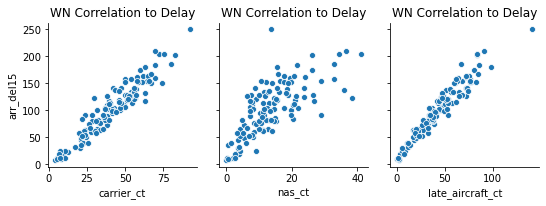

In [57]:
q= sns.pairplot(southwest_data_BDL,
    x_vars=["carrier_ct", "nas_ct",'late_aircraft_ct' ],
    y_vars=["arr_del15"],)
q.set(title = 'WN Correlation to Delay')

In [74]:
delta_data_BDL = selected_airport_data[selected_airport_data["carrier"] == "DL"]  
american_data_BDL = selected_airport_data[selected_airport_data["carrier"] == "AA"]
blue_data_BDL = selected_airport_data[selected_airport_data["carrier"] == "B6"]

american_data_BDL.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,CT
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0
mean,2016.123967,6.512397,242.123967,47.363636,17.300496,2.059091,12.458099,0.141901,15.404298,5.024793,0.371901,2518.008264,918.983471,162.793388,452.752066,5.479339,978.000000,10.0
std,2.948362,3.454745,121.176082,31.490210,10.900019,2.274542,9.306453,0.321015,12.280612,11.729211,0.696805,1959.551583,686.056351,207.571430,374.099815,13.218106,900.469831,0.0
min,2011.000000,1.000000,79.000000,6.000000,2.410000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,203.000000,60.000000,0.000000,5.000000,0.000000,0.000000,10.0
25%,2014.000000,4.000000,124.000000,21.000000,8.510000,0.260000,5.210000,0.000000,6.770000,0.000000,0.000000,1145.000000,427.000000,15.000000,167.000000,0.000000,379.000000,10.0
50%,2016.000000,7.000000,223.000000,39.000000,13.620000,1.380000,10.370000,0.000000,11.060000,2.000000,0.000000,1844.000000,666.000000,88.000000,313.000000,0.000000,656.000000,10.0
75%,2019.000000,9.000000,364.000000,69.000000,24.210000,2.910000,17.060000,0.000000,22.080000,5.000000,1.000000,3297.000000,1280.000000,232.000000,652.000000,0.000000,1363.000000,10.0
max,2021.000000,12.000000,470.000000,137.000000,45.490000,9.690000,45.010000,1.830000,54.670000,84.000000,4.000000,8216.000000,3395.000000,956.000000,1664.000000,62.000000,3892.000000,10.0


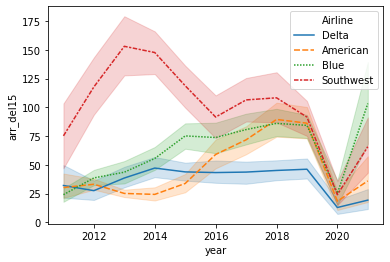

In [70]:
concatenated = pd.concat([delta_data_BDL.assign(Airline='Delta'), american_data_BDL.assign(Airline='American'), blue_data_BDL.assign(Airline='Blue'),southwest_data_BDL.assign(Airline='Southwest')])

sns.lineplot(x='year', y='arr_del15', data=concatenated,hue = "Airline", style='Airline')
plt.show()